# SF-DAT-21 | Unit Project 4

In this project, you will summarize and present your analysis from Unit Projects 1-3.

### Question 1. Introduction: Write a problem Statement/Specific Aim for this project.

Answer: We wish to create a predictive model for whether an applicant will be admitted or not depending on the following variables: GPA, GRE, & Prestige/Status of school they are coming from.

### Question 2. Dataset: Write up a description of your data and any cleaning that was completed.

Answer: We called dropna() on the dataframe to remove any rows containing nulls. This removed 3 records out of 400, leaving 397 remaining. We also converted the categorical variable, prestige, into 4 boolean columns representing the four possible integer values. No other cleanup was required.

Variable | Description | Type of Variable
---|---|---
Admit | 0 = Not Admitted, 1 = Admitted | Categorical
Graduate Record Examination (GRE) | Integer score, higher is better | Continuous
Grade Point Average (GPA) | float, higher is better, max is 4.0 | Continuous
Prestige | Prestige of alma mater, 1 = lowest, 4 = highest | Categorical

### Question 3. Demo: Provide a table that explains the data by admission status.

Mean (STD) or counts by admission status for each variable (total count of 397)

| Not Admitted | Admitted
---| ---|---
GPA |(mean/std) 3.35/0.38 | (mean/std) 3.49/0.37
GRE |(mean/std) 573.58/116.06 | (mean/std) 618.57/109.25
Prestige 1 | (freq/prob) 28/45.90% | (freq/prob) 33/54.10%
Prestige 2 | (freq/prob) 95/64.19% | (freq/prob) 53/35.81%
Prestige 3 | (freq/prob) 93/76.86% | (freq/prob) 28/23.14%
Prestige 4 | (freq/prob) 55/82.09% | (freq/prob) 12/17.91%

### Question 4. Methods: Write up the methods used in your analysis.

Answer: After cleaning up and transforming the data to be more amenable to analysis, we set aside a randomly selected 40% subset of the data for testing later. Then we analyse the remaing 60% of the data looking for highly correlated variables using the DataFrame.corr() method. We plotted a histogram looking for a normal distribution for GRE and GPA, which we found. Then we trained a variety of logistic regression models using the scikit-learn modules linear_model.LogisticRegression. 

2- We specified a problem statement.
3- Created an Exploratory Analysis Plan which includes:
       3-a Create a summary table
       3-b Drop data points with missing data
       3-c Describe each distribution
       3-d Calculate correlation
4- Created frequency tables
5- Created dummy variables
6- Applied Logistic regression
7- Calculated the odds ratios of the coeffincients and their 95% CI intervals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
from sklearn import linear_model
%matplotlib inline

df_raw = pd.read_csv("admissions.csv")

In [2]:
df_raw.dropna(inplace=True)

In [3]:
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [4]:
dummy_ranks = pd.get_dummies(df_raw.prestige, prefix = 'P')
cols_to_keep = ['admit', 'gre', 'gpa']
df = df_raw[cols_to_keep].join(dummy_ranks.ix[:, 'P_1':])
df.columns = ['admit', 'gre', 'gpa','P_1','P_2','P_3','P_4']
print df.head()

#handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'P_1':])
#handCalc

for col in ('P_1', 'P_2', 'P_3', 'P_4'):
    print 'Prestige {} probability {:.0f}%'.format(col, df[df[col] == True]['admit'].mean() * 100)
    
# pd.crosstab(df.admit, handCalc.P_1)

   admit    gre   gpa  P_1  P_2  P_3  P_4
0      0  380.0  3.61  0.0  0.0  1.0  0.0
1      1  660.0  3.67  0.0  0.0  1.0  0.0
2      1  800.0  4.00  1.0  0.0  0.0  0.0
3      1  640.0  3.19  0.0  0.0  0.0  1.0
4      0  520.0  2.93  0.0  0.0  0.0  1.0
Prestige P_1 probability 54%
Prestige P_2 probability 36%
Prestige P_3 probability 23%
Prestige P_4 probability 18%


In [5]:
admit1df = df[df.admit == 1]
admit0df = df[df.admit == 0]
admit0df.describe()

,admit,gre,gpa,P_1,P_2,P_3,P_4
count,271.0,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,0.0,573.579336,3.347159,0.103321,0.350554,0.343173,0.202952
std,0.0,116.052798,0.376355,0.304941,0.478026,0.475647,0.402941
min,0.0,220.000000,2.260000,0.000000,0.000000,0.000000,0.000000
25%,0.0,500.000000,3.080000,0.000000,0.000000,0.000000,0.000000
50%,0.0,580.000000,3.340000,0.000000,0.000000,0.000000,0.000000
75%,0.0,660.000000,3.610000,0.000000,1.000000,1.000000,0.000000
max,0.0,800.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
admit1df.describe()

,admit,gre,gpa,P_1,P_2,P_3,P_4
count,126.0,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,1.0,618.571429,3.489206,0.261905,0.420635,0.222222,0.095238
std,0.0,109.257233,0.371655,0.441426,0.495632,0.417399,0.294715
min,1.0,300.000000,2.420000,0.000000,0.000000,0.000000,0.000000
25%,1.0,540.000000,3.220000,0.000000,0.000000,0.000000,0.000000
50%,1.0,620.000000,3.545000,0.000000,0.000000,0.000000,0.000000
75%,1.0,680.000000,3.757500,1.000000,1.000000,0.000000,0.000000
max,1.0,800.000000,4.000000,1.000000,1.000000,1.000000,1.000000


admit         0.466044
gre         115.717787
gpa           0.380208
prestige      0.947083
dtype: float64
prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


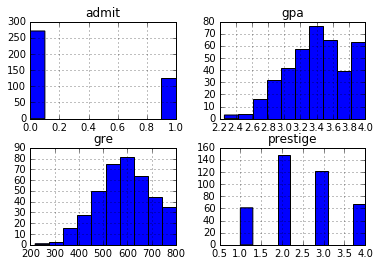

In [7]:
print df_raw.std()
# frequency table cutting presitge and whether or not someone was admitted
print pd.crosstab(df_raw['admit'], df_raw['prestige'], rownames=['admit'])

# plot all of the columns
df_raw.hist()
pl.show()

In [8]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'P_2':])
print data.head()

   admit    gre   gpa  P_2.0  P_3.0  P_4.0
0      0  380.0  3.61    0.0    1.0    0.0
1      1  660.0  3.67    0.0    1.0    0.0
2      1  800.0  4.00    0.0    0.0    0.0
3      1  640.0  3.19    0.0    0.0    1.0
4      0  520.0  2.93    0.0    0.0    1.0


In [9]:
data['intercept'] = 1.0
data.head()

,admit,gre,gpa,P_2.0,P_3.0,P_4.0,intercept
0,0,380.0,3.61,0.0,1.0,0.0,1.0
1,1,660.0,3.67,0.0,1.0,0.0,1.0
2,1,800.0,4.00,0.0,0.0,0.0,1.0
3,1,640.0,3.19,0.0,0.0,1.0,1.0
4,0,520.0,2.93,0.0,0.0,1.0,1.0


In [10]:
train_cols = data[ ['gre', 'gpa', 'P_2.0','P_3.0','P_4.0','intercept'] ] #we're treating P_1 as our baseline and excluding it from our fit to avoid multicollinearity 
logit_mod = sm.Logit(data.admit, train_cols)
logit_res = logit_mod.fit()
print logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 07 Apr 2016   Pseudo R-squ.:                 0.08166
Time:                        19:44:31   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa            0.7793      0.

In [11]:
coefficients = logit_res.params 
confidence_interval = logit_res.conf_int() #shows how good the model's coefficients are.
confidence_interval['OR'] = coefficients
confidence_interval.columns = ['2.5%', '97.5%', 'OR'] #shows how a 1 unit change in the variables affects the odds of admission
print np.exp(confidence_interval) #calculate odds ratios using different confidence intervals to show how uncertainty can impact the variables

               2.5%     97.5%        OR
gre        1.000074  1.004372  1.002221
gpa        1.136120  4.183113  2.180027
P_2.0      0.272168  0.942767  0.506548
P_3.0      0.133377  0.515419  0.262192
P_4.0      0.093329  0.479411  0.211525
intercept  0.002207  0.194440  0.020716


In [12]:
def cartesian(arrays, out=None):

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ]) show various gre scores
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ]) show various gpas with predictions


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':]) #since prestige 1 is our baseline we can get rid of it.

combos['admit_pred'] = logit_res.predict(combos[ ['gre', 'gpa', 'prestige_2','prestige_3','prestige_4','intercept'] ])
combos.head() #this creates a range of values to get predictions 

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


,gre,gpa,prestige,intercept,prestige_2,prestige_3,prestige_4,admit_pred
0,220.0,2.260000,1.0,1.0,0.0,0.0,0.0,0.164173
1,220.0,2.260000,2.0,1.0,1.0,0.0,0.0,0.090492
2,220.0,2.260000,3.0,1.0,0.0,1.0,0.0,0.048977
3,220.0,2.260000,4.0,1.0,0.0,0.0,1.0,0.039890
4,220.0,2.453333,1.0,1.0,0.0,0.0,0.0,0.185907


### Question 5. Results: Write up your results.

Answer: results show gre, gpa, and prestige affect the admission levels. The probability of admission gradually increases as gre and gpa increase and that the different prestige levels yield drastic probabilities of admission (particularly the most/least prestigious schools).  

### Question 6. Visuals: Provide a table or visualization of these results.

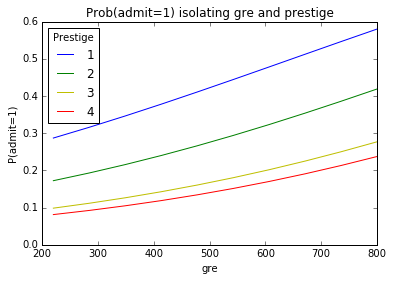

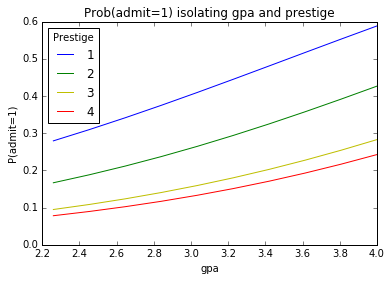

In [13]:
def visadmit(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
    
    # make a plot
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and prestige")
    pl.show()

visadmit('gre') #shows how increasing gre scores contributes significantly to admission
visadmit('gpa') #shows how increasing gpa scores and prestige level contributes to admission

### question 7. Discussion: Write up your discussion and future steps.

Answer: Conclusions:

   For a unit increase in gpa, the odds of being admitted to UCLA graduate school increase by a facto of 2.  There is a high correlation between gpa and gre, as well as admit and gre.
